In [23]:
import sys
import random
import os
import numpy as np
import iisignature as iis
import matplotlib.pyplot as plt
import gudhi
from gudhi import plot_persistence_diagram
from gudhi import plot_persistence_density
from gtda.homology import VietorisRipsPersistence
from gtda.homology import FlagserPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Amplitude
from gudhi.representations.vector_methods import Entropy
from gtda.diagrams import PairwiseDistance
from gtda.plotting import plot_diagram
import numpy.random as rd
import gudhi.representations
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore

In [24]:
%run FUNCTIONS.ipynb

In [25]:
ages=[10.888,11.455,12.222,12.641,14.036,14.277,14.419,16.005,16.227,16.34,16.682,17,18,18.134,18.855,18.942,19,19.548,20.995,21,21,21,22,24,24.088,24.329,24.775,24.789,24.923,25.378,26.493,27.074,27.173,27.485,27.611,27.723,27.874,28.822,29.553,30.589,31.036,31.074,31.195,33.474,33.532,34.816,35.786,38.479,38.89,39.334,42.005,42.14,42.384,43.318,43.836,44.74,46.178,46.515,47.197,47.929,49.123,49.86,50.142,50.808,51.03,51.115,51.674,52.266,52.43,53.173,54.31,55.989,56.345,57.186,57.348,57.877,59.058,59.94,60,60.299,60.69,60.852,61.762,62,62.392,64,64.211,64.471,64.721,64.74,65.044,66,66,67.655,68,68.362,69.926,70,70,70,70.058,70.553,71.016,72.364,72.819,73,73,73,75.559,76.019,76.608,77,78.085,78.247,78.767,78.849,17,17.447,18.23,19,19,19,19,20,20,20,20.184,21,21.258,21.458,21.953,22,22,22,22,22,22,23.005,24,25.079,61.395,62,62,63,63,63.458,65.564,66.74,66.975,68.436,69,70.104,70.636,71.359,73.159,73.34,74.227,77,77.055,79,80]
np.save('Ages.npy',ages)

In [26]:
ls

 Il volume nell'unità C è OS
 Numero di serie del volume: 3A69-277E

 Directory di C:\Users\Utente\Desktop\real_brain_age

11/09/2023  20:50    <DIR>          .
10/09/2023  18:20    <DIR>          ..
08/09/2023  18:24    <DIR>          .ipynb_checkpoints
11/09/2023  20:50           722.542 Age_Marta.ipynb
08/09/2023  17:07           194.201 Age_real_data_Hyper_coherence_curve.ipynb
11/09/2023  20:52             1.416 Ages.npy
07/09/2023  11:43            11.403 FUNCTIONS.ipynb
07/09/2023  17:47            64.040 ts_m20_p1.txt
07/09/2023  17:48            64.040 ts_m20_p10.txt
07/09/2023  18:08            64.040 ts_m20_p100.txt
07/09/2023  18:09            64.040 ts_m20_p101.txt
07/09/2023  18:09            64.040 ts_m20_p102.txt
07/09/2023  18:09            64.040 ts_m20_p103.txt
07/09/2023  18:09            64.040 ts_m20_p104.txt
07/09/2023  18:09            64.040 ts_m20_p105.txt
07/09/2023  18:10            64.040 ts_m20_p106.txt
07/09/2023  18:10            64.040 ts_m20_p107.txt
0

In [27]:
# Path signature
Sig_list=list()
labels=[]
for i in range(161):
    data=np.loadtxt(f'ts_m20_p{i+1}.txt')
    time_series=data.transpose()
    s=iis.prepare(20,2)
    sig=iis.logsig(time_series,s)
    Sig_list.append(sig)
    age=ages[i]
    if age<20:
        labels.append("Y")
    if ((age>=20) and (age<40)):
        labels.append("A")
    if ((age>=40) and (age <60)):
        labels.append("M")
    if age>=60:
        labels.append("E")

Sig=np.array(Sig_list)

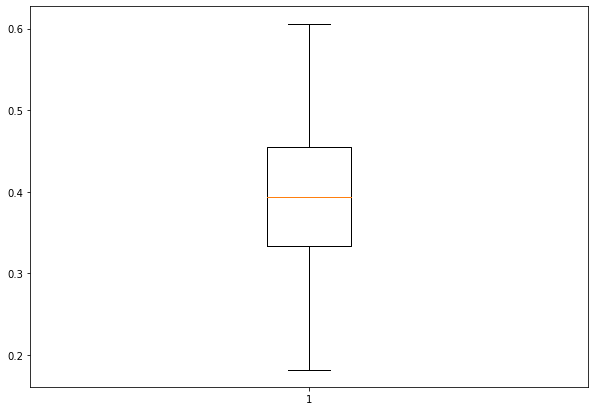

In [28]:
#PLOT OF NAIVE BAYES ACCURACY

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(Sig,labels,test_size=0.2)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()

In [29]:
# PLOT OF THE ACCURACY VALUES WITH PATH SIGNATURE AND KNN, CHANGING K



accuracy_knn=np.zeros((19,100))
for k in range(1,20):
    acc_values_knn=[]
    for i in range(100):
        X_train, X_test, y_train, y_test=train_test_split(Sig,labels,test_size=0.2)
        clf_knn= KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
        y_predicted= clf_knn.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_values_knn.append(acc)
    accuracy_knn[k-1,:]=acc_values_knn
    
accuracy_knn_def=accuracy_knn.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.boxplot(accuracy_knn_def)
plt.show()

KeyboardInterrupt: 

In [ ]:
Lead_list=list()
labels=[]
for i in range(161):
    data=np.loadtxt(f'ts_m20_p{i+1}.txt')
    time_series=(data.transpose())[100:,:]
    L=lead_matrix_1(time_series)
    N=L.shape[0]
    feat=[]
    for j in range(N):
        for k in range(j,N):
            if (not j==k):
                feat.append(L[j,k])
    Lead_list.append(feat)
    age=ages[i]
    if age<20:
        labels.append("Y")
    if ((age>=20) and (age<40)):
        labels.append("A")
    if ((age>=40) and (age <60)):
        labels.append("M")
    if age>=60:
        labels.append("E")

LEAD=np.array(Lead_list)

In [ ]:
#PLOT OF NAIVE BAYES ACCURACY

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(LEAD,labels,test_size=0.2)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()

In [ ]:
# PLOT OF THE ACCURACY VALUES KNN, CHANGING K



accuracy_knn=np.zeros((19,100))
for k in range(1,20):
    acc_values_knn=[]
    for i in range(100):
        X_train, X_test, y_train, y_test=train_test_split(LEAD,labels,test_size=0.2)
        clf_knn= KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
        y_predicted= clf_knn.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_values_knn.append(acc)
    accuracy_knn[k-1,:]=acc_values_knn
    
accuracy_knn_def=accuracy_knn.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.boxplot(accuracy_knn_def)
plt.show()

In [31]:
# top undirected mod 

top_dir_un_list=list()
labels=[]
for i in range(161):
    data=np.loadtxt(f'ts_m20_p{i+1}.txt')
    time_series=data.transpose()[100:200,:]
    L=lead_matrix_1(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    top_dir_un_list.append(feat)
    age=ages[i]
    if age<20:
        labels.append("Y")
    if ((age>=20) and (age<40)):
        labels.append("A")
    if ((age>=40) and (age <60)):
        labels.append("M")
    if age>=60:
        labels.append("E")

top_dir_un_array=np.array(top_dir_un_list)

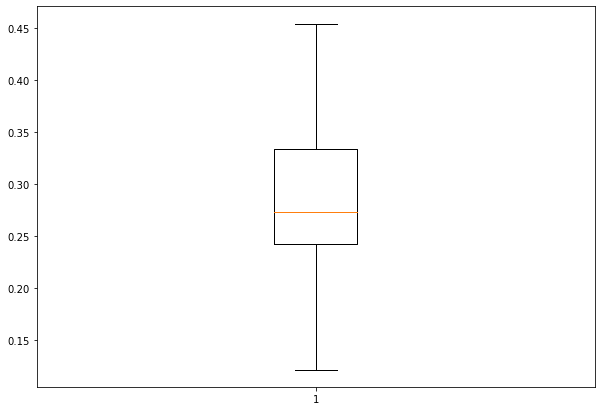

In [32]:
#PLOT OF NAIVE BAYES ACCURACY

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(top_dir_un_array,labels,test_size=0.2)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()

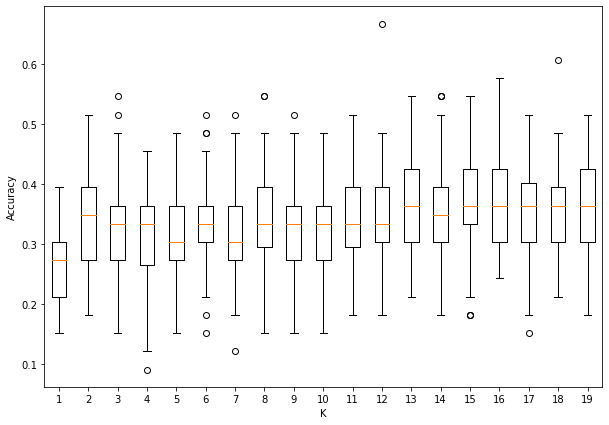

In [50]:
# PLOT OF THE ACCURACY VALUES WITH PATH SIGNATURE AND KNN, CHANGING K



accuracy_knn=np.zeros((19,100))
for k in range(1,20):
    acc_values_knn=[]
    for i in range(100):
        X_train, X_test, y_train, y_test=train_test_split(top_dir_un_array,labels,test_size=0.2)
        clf_knn= KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
        y_predicted= clf_knn.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_values_knn.append(acc)
    accuracy_knn[k-1,:]=acc_values_knn
    
accuracy_knn_def=accuracy_knn.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.boxplot(accuracy_knn_def)
plt.show()

In [51]:
# Hyp + entropy
indifference_value=0.05
High_list=list()
labels=[]
for i in range(161):
    data=np.loadtxt(f'ts_m20_p{i+1}.txt')
    time_series=1000*(data.transpose()[100:170,:])
    dgm,hyp=create_diagram_directly_3(time_series,indifference_value)
    S_0,S_1=entropy_gu_ad(dgm)
    feat=[hyp,S_0,S_1]
    High_list.append(feat)
    age=ages[i]
    if age<20:
        labels.append("Y")
    if ((age>=20) and (age<40)):
        labels.append("A")
    if ((age>=40) and (age <60)):
        labels.append("M")
    if age>=60:
        labels.append("E")

HIGH=np.array(High_list)

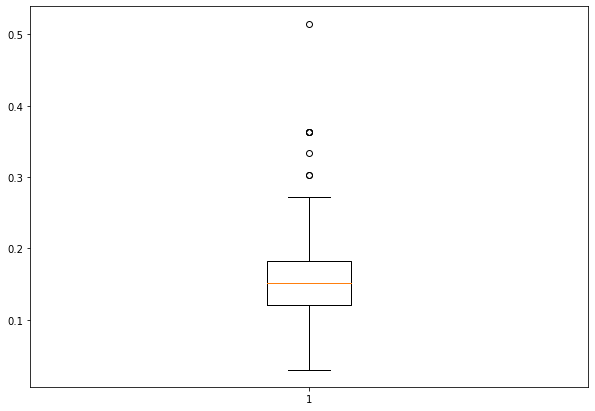

In [52]:
#PLOT OF NAIVE BAYES ACCURACY

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(HIGH,labels,test_size=0.2)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()

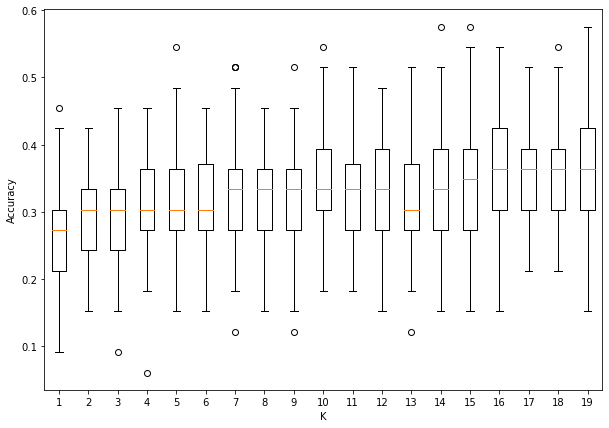

In [53]:
# PLOT OF THE ACCURACY VALUES WITH PATH SIGNATURE AND KNN, CHANGING K



accuracy_knn=np.zeros((19,100))
for k in range(1,20):
    acc_values_knn=[]
    for i in range(100):
        X_train, X_test, y_train, y_test=train_test_split(HIGH,labels,test_size=0.2)
        clf_knn= KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
        y_predicted= clf_knn.predict(X_test)
        acc=accuracy_score(y_test,y_predicted)
        acc_values_knn.append(acc)
    accuracy_knn[k-1,:]=acc_values_knn
    
accuracy_knn_def=accuracy_knn.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.boxplot(accuracy_knn_def)
plt.show()

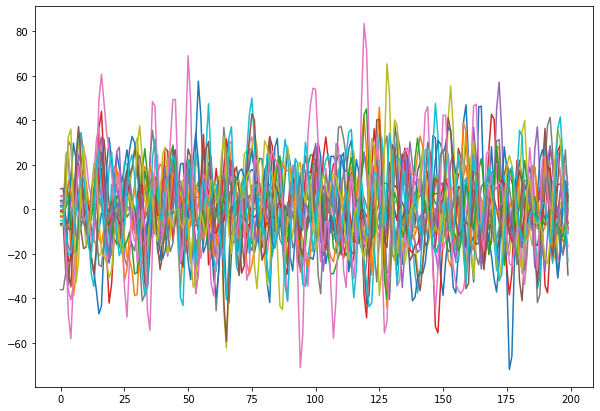

In [76]:
data=np.loadtxt("ts_m20_p2.txt")
time_series=data.transpose()
plt.figure(figsize=(10,7))
for i in range(time_series.shape[1]):
    plt.plot(range(time_series.shape[0]),time_series[:,i])
plt.show()

In [77]:
L=lead_matrix_1(time_series)
dgm=rev_directed(L)
plot_diagram(dgm[0])

0.9447368421052632


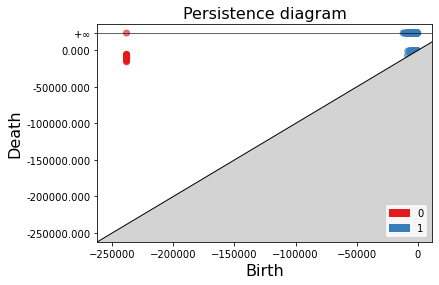

In [78]:
dgm,hyp=create_diagram_directly_3(time_series,0)
plot_persistence_diagram(dgm)
print(hyp)

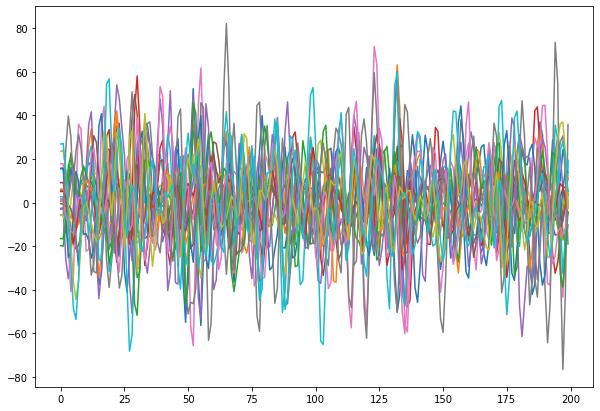

In [79]:
data=np.loadtxt("ts_m20_p79.txt")
time_series=data.transpose()
plt.figure(figsize=(10,7))
for i in range(time_series.shape[1]):
    plt.plot(range(time_series.shape[0]),time_series[:,i])
plt.show()

In [80]:
L=lead_matrix_1(time_series)
dgm=rev_directed(L)
plot_diagram(dgm[0])

0.9614035087719298


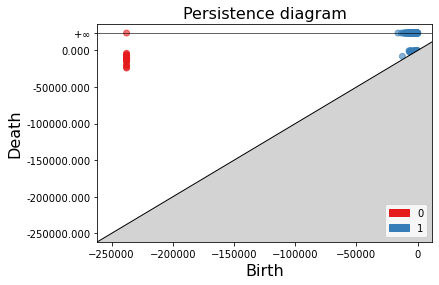

In [81]:
dgm,hyp=create_diagram_directly_3(time_series,0)
plot_persistence_diagram(dgm)
print(hyp)

In [129]:
# top directed mod only YE

top_dir_list_YE=list()
labels=[]
for i in range(161):
    data=np.loadtxt(f'ts_m20_p{i+1}.txt')
    time_series=data.transpose()[10:,:]
    L=lead_matrix_2(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    
    age=ages[i]
    if age<20:
        labels.append("Y")
        top_dir_list_YE.append(feat)
    #if ((age>=20) and (age<40)):
        #labels.append("A")
    #if ((age>=40) and (age <60)):
        #labels.append("M")
    if age>=60:
        labels.append("E")
        top_dir_list_YE.append(feat)

top_dir_YE=np.array(top_dir_list_YE)

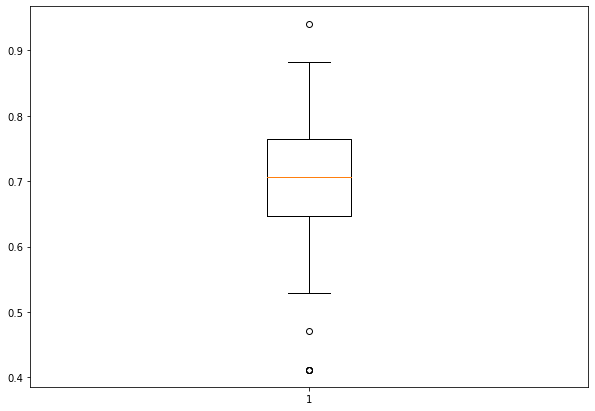

In [130]:
#PLOT OF NAIVE BAYES ACCURACY

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(top_dir_YE,labels,test_size=0.2)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()

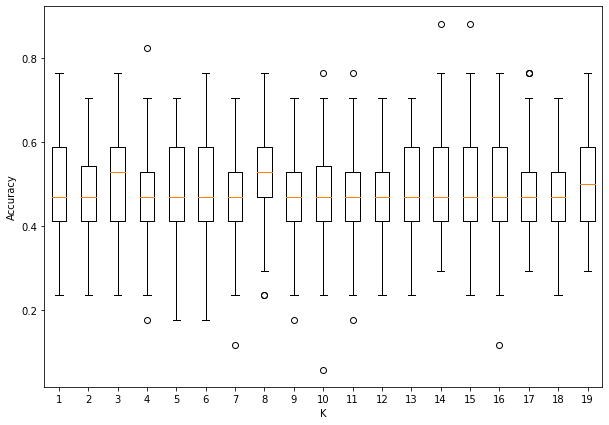

In [104]:
# PLOT OF THE ACCURACY VALUES WITH PATH SIGNATURE AND KNN, CHANGING K



accuracy_knn=np.zeros((19,100))
for k in range(1,20):
    acc_values_knn=[]
    for i in range(100):
        X_train, X_test, y_train, y_test=train_test_split(top_dir_YE,labels,test_size=0.2)
        acc=accuracy_score(y_test,y_predicted)
        acc_values_knn.append(acc)
    accuracy_knn[k-1,:]=acc_values_knn
    
accuracy_knn_def=accuracy_knn.tolist()
fig = plt.figure(figsize =(10, 7))
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.boxplot(accuracy_knn_def)
plt.show()

In [139]:
# top directed mod only YA

top_dir_list_YA=list()
labels=[]
for i in range(161):
    data=np.loadtxt(f'ts_m20_p{i+1}.txt')
    time_series=data.transpose()
    L=lead_matrix_2(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    
    age=ages[i]
    if age<20:
        labels.append("Y")
        top_dir_list_YA.append(feat)
    if ((age>=22) and (age<40)):
        labels.append("A")
        top_dir_list_YA.append(feat)
    #if ((age>=40) and (age <60)):
        #labels.append("M")
        #top_dir_list_YA.append(feat)
    #if age>=60:
        #labels.append("E")
        #top_dir_list_YE.append(feat)

top_dir_YA=np.array(top_dir_list_YA)

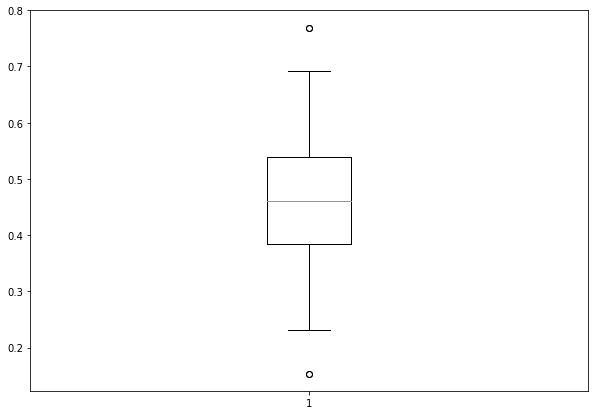

In [140]:
#PLOT OF NAIVE BAYES ACCURACY

acc_values_nb=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(top_dir_YA,labels,test_size=0.2)
    clf_nb=GaussianNB().fit(X_train,y_train)
    y_predicted=clf_nb.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_nb.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_nb)
 
plt.show()